
What is the content, could you read it? do you understand collumns?
Explore the data for housing
  --> make scatter plot of selected features
  --> create simple regression model of sqft_living to price
  --> evaluate a simple model
  --> is linear function good enough? try quadratic polynomial
Split your data into training sample and test sample
  --> what is trainign error and testing error of your model?
  --> predict the house price for a given sqft_living
  --> predict the sqft_living for a given price of the house
  --> add more feaures
  --> is the model better now?
  --> maybe using range of data would work better?
  --> predict house price for a house id = 5309101299
what is this house like?
  --> predict house price for a house id = 1925069082
Explore more those data!!!  

In [3]:
import graphlab
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_data_frame = graphlab.SFrame('kc_house_data.csv')


Finished parsing file /Users/mnawojow/Downloads/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.090859 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/mnawojow/Downloads/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.067223 secs.

In [5]:
#we can view first few lines of table
all_data_frame 

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0


In [6]:
# view end of the table
all_data_frame.tail()  

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7852140040,20140825T000000,507250.0,3,2.5,2270,5536,2.0,0,0
9834201367,20150126T000000,429000.0,3,2.0,1490,1126,3.0,0,0
3448900210,20141014T000000,610685.0,4,2.5,2520,6023,2.0,0,0
7936000429,20150326T000000,1007500.0,4,3.5,3510,7200,2.0,0,0
2997800021,20150219T000000,475000.0,3,2.5,1310,1294,2.0,0,0
263000018,20140521T000000,360000.0,3,2.5,1530,1131,3.0,0,0
6600060120,20150223T000000,400000.0,4,2.5,2310,5813,2.0,0,0
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0
291310100,20150116T000000,400000.0,3,2.5,1600,2388,2.0,0,0
1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0


In [7]:
# .show() visualizes any data structure in GraphLab Create
all_data_frame.show()
graphlab.canvas.set_target('ipynb')

Canvas is accessible via web browser at the URL: http://localhost:49219/index.html
Opening Canvas in default web browser.


In [8]:
#scatter plot for sqft_living and price
all_data_frame.show(view="Scatter Plot", x="sqft_living", y="price")

In [9]:
#time to create our model!
#split data for train and test
train_data,test_data = all_data_frame.random_split(.8,seed=0)
sqft_linear_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

In [10]:
#What about errors?
print sqft_linear_model.training_rmse
print sqft_linear_model.evaluate(test_data)
sqft_linear_model.get('coefficients')

+-----------+----------+--------------+--------------------+---------------+

262943.613519
{'max_error': 4143550.874517013, 'rmse': 255191.02748709585}


| 1         | 2        | 1.027905     | 4349521.915863     | 262943.613519 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

name,index,value,stderr
(intercept),None,-47114.0231682,4923.34437313
sqft_living,None,281.957851229,2.1640546513


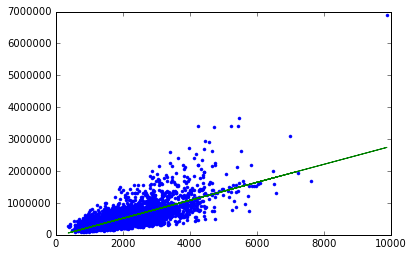

In [11]:
#lets see it on plot
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_linear_model.predict(test_data),'-')

In [12]:
#not the best model, isn't it?
house_sqft_1 = all_data_frame.filter_by(1530, 'sqft_living')[0]
print house_sqft_1['price']
print sqft_linear_model.predict(house_sqft_1)

house1 = all_data_frame.filter_by(5631500400, 'id')
print house1['price']
print sqft_linear_model.predict(house1)

house2 = all_data_frame.filter_by(3448900210, 'id')
print house2['price']
print sqft_linear_model.predict(house2)

269900.0
[384281.4892116396]
[180000.0]
[169993.52227788075]
[610685.0]
[663419.7619279834]


In [13]:
#maybe graphlab will help us
train_data,test_data = all_data_frame.random_split(.8,seed=0)
sqft_trees_model_reg = graphlab.regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

+-----------+--------------+--------------------+---------------+

| Iteration | Elapsed Time | Training-max_error | Training-rmse |

+-----------+--------------+--------------------+---------------+

| 1         | 0.013951     | 6311689.500000     | 491358.468750 |

| 2         | 0.021349     | 5293596.000000     | 386686.187500 |

| 3         | 0.029429     | 4371103.000000     | 322246.531250 |

| 4         | 0.036849     | 3716847.000000     | 284406.031250 |

| 5         | 0.045122     | 3037227.500000     | 262934.843750 |

| 6         | 0.052982     | 2493532.000000     | 251163.484375 |

+-----------+--------------+--------------------+---------------+

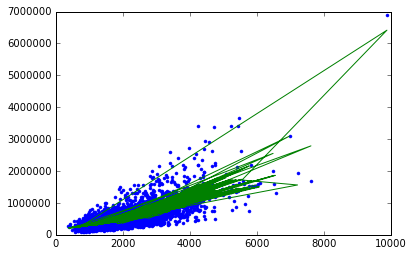

In [14]:
#looks odd
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_trees_model_reg.predict(test_data),'-')

In [15]:
#even worst!
print sqft_trees_model_reg.training_rmse
print sqft_trees_model_reg.evaluate(test_data)
house_sqft_1 = all_data_frame.filter_by(1530, 'sqft_living')[0]
print house_sqft_1['price']
print sqft_trees_model_reg.predict(house_sqft_1)
print house1['price']
print sqft_trees_model_reg.predict(house1)
print house2['price']
print sqft_trees_model_reg.predict(house2)

237207.328125
{'max_error': 2104453.25, 'rmse': 243363.25455260428}
269900.0
[409591.84375]
[180000.0]
[270168.96875]
[610685.0]
[563811.0625]


In [16]:
#let's find other feature which we can use
all_data_frame.show(view="Scatter Plot", x="bedrooms", y="price")
all_data_frame.show(view="Scatter Plot", x="bathrooms", y="price")
all_data_frame.show(view="Scatter Plot", x="floors", y="price")
all_data_frame.show(view="Scatter Plot", x="condition", y="price")
all_data_frame.show(view="Scatter Plot", x="view", y="price")
all_data_frame['Yr of last reno'] = all_data_frame.apply(lambda x: x['yr_built'] if x['yr_built'] > x['yr_renovated'] else x['yr_renovated'])
all_data_frame.show(view="Scatter Plot", x="Yr of last reno", y="price")

In [17]:
train_data,test_data = all_data_frame.random_split(.8,seed=0)
features_linear_model = graphlab.linear_regression.create(train_data, target='price', features=['zipcode','sqft_living', 'Yr of last reno', 'bedrooms', 'bathrooms'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 5

Number of unpacked features : 5

Number of coefficients    : 6

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.053568     | 4094434.043863     | 250213.605422 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [18]:
#What about errors?
print features_linear_model.training_rmse
print features_linear_model.evaluate(test_data)
features_linear_model.get('coefficients')

250213.605422
{'max_error': 3794194.752633823, 'rmse': 247129.0054770335}


name,index,value,stderr
(intercept),None,-2036023.70051,3754992.94437
zipcode,None,74.3476724714,37.78987642
sqft_living,None,308.27582213,3.35814748776
Yr of last reno,None,-2664.64849342,82.5263907012
bedrooms,None,-76278.8775411,2658.84140529
bathrooms,None,74663.8072471,4296.6619616


In [19]:
print house_sqft_1['price']
print features_linear_model.predict(house_sqft_1)
print house1['price']
print features_linear_model.predict(house1)
print house2['price']
print features_linear_model.predict(house2)

269900.0
[292963.3587958757]
[180000.0]
[153003.20344952238]
[610685.0]
[654005.5827954549]


In [20]:
#testing something funny
all_data_frame['score'] = all_data_frame.apply(lambda x: x['bedrooms'] * 600 + x['bathrooms'] * 1000 + 2 * x['sqft_living'] 
+ x['Yr of last reno'] + x['condition'] * 400 + x['view'] * 400)
all_data_frame.show(view="Scatter Plot", x="score", y="price")
train_data,test_data = all_data_frame.random_split(.8,seed=0)
score_linear_model = graphlab.linear_regression.create(train_data, target='price', features=['score'],validation_set=None)
print score_linear_model.training_rmse
print score_linear_model.evaluate(test_data)
score_linear_model.get('coefficients')
print house_sqft_1['price']
print score_linear_model.predict(house_sqft_1)
print house1['price']
print score_linear_model.predict(house1)
print house2['price']
print score_linear_model.predict(house2)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.016902     | 4819111.699438     | 270430.061012 |

+-----------+----------+--------------+--------------------+---------------+

270430.061012


SUCCESS: Optimal solution found.

{'max_error': 4268225.061822373, 'rmse': 260702.82443742504}
269900.0
[539366.6279337317]
[180000.0]
[539366.6279337317]
[610685.0]
[539366.6279337317]


In [21]:
print house1['price']
print house2['price']

print "LINEAR sqft"

print sqft_linear_model.evaluate(test_data)
print sqft_linear_model.predict(house1)
print sqft_linear_model.predict(house2)

print "LINEAR feature"

print features_linear_model.evaluate(test_data)
print features_linear_model.predict(house1)
print features_linear_model.predict(house2)


[180000.0]
[610685.0]
LINEAR sqft
{'max_error': 4143550.874517013, 'rmse': 255191.02748709585}
[169993.52227788075]
[663419.7619279834]
LINEAR feature
{'max_error': 3794194.752633823, 'rmse': 247129.0054770335}
[153003.20344952238]
[654005.5827954549]
